In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 18,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
plot_colors = {"dnn_mobile":"#344FE9","coted_mobile":"#AFC110", "trans": "#1BC266", "coted_edge":"#E89923", "dnn_edge":"#9736F1","bw_usage":"#6D6D6D"}

In [4]:
local_df = pd.read_csv("../measurements/local_long/map.csv")


mtl_cha_df = pd.read_csv("../measurements/real_bw_test/characteristic.csv")
mtl_time_df = pd.read_csv("../measurements/real_bw_test/time.csv")

ltl_cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
ltl_time_df = pd.read_csv("../measurements/real_bw_test_15fps/time.csv")

mtlhl_cha_df = pd.read_csv("../measurements/real_bw_no_jpeg/characteristic.csv")
mtlhl_time_df = pd.read_csv("../measurements/real_bw_no_jpeg/time.csv")

htllm_cha_df = pd.read_csv("../measurements_large/test_mtlhq_5_500/characteristic.csv")
htllm_time_df = pd.read_csv("../measurements_large/test_mtlhq_5_500/time.csv")


In [5]:
cal_time = []
for i in range(len(mtlhl_time_df)):
    if mtlhl_time_df["technique"][i] == 2:
        cal_time.append(mtlhl_time_df["compression_time"][i]/32)
    else:
        cal_time.append(mtlhl_time_df["compression_time"][i])
mtlhl_time_df["compression_time"] = cal_time

cal_time = []
for i in range(len(mtlhl_time_df)):
    if mtlhl_time_df["technique"][i] == 3:
        cal_time.append(mtlhl_time_df["compression_time"][i]-50)
    else:
        cal_time.append(mtlhl_time_df["compression_time"][i])
mtlhl_time_df["compression_time"] = cal_time

cal_time = []
for i in range(len(mtl_time_df)):
    if mtl_time_df["technique"][i] == 3:
        cal_time.append(mtl_time_df["compression_time"][i]-50)
    else:
        cal_time.append(mtl_time_df["compression_time"][i])
mtl_time_df["compression_time"] = cal_time

In [6]:
tiny_trans_df = 128*26*26*8/mtl_cha_df["bandwidth"]*1000
full_trans_df = 128*104*104*8/htllm_cha_df["bandwidth"]*1000

mtl_time_df["transmission_time"] = mtl_cha_df["datasize_est"]*8/mtl_cha_df["consumed_bw"]*1000
mtl_time_df["overall_est"] = mtl_time_df["model_head_time"]*10+mtl_time_df["model_tail_time"]+mtl_time_df["framework_head_time"]+mtl_time_df["framework_tail_time"] + mtl_time_df["compression_time"]+mtl_time_df["decompression_time"]+ mtl_time_df["transmission_time"]

ltl_time_df["transmission_time"] = ltl_cha_df["datasize_est"]*8/ltl_cha_df["consumed_bw"]*1000
ltl_time_df["overall_est"] = ltl_time_df["model_head_time"]*10+ltl_time_df["model_tail_time"]+ltl_time_df["framework_head_time"]+ltl_time_df["framework_tail_time"] + ltl_time_df["compression_time"]+ltl_time_df["decompression_time"]+ ltl_time_df["transmission_time"]

mtlhl_time_df["transmission_time"] = mtlhl_cha_df["datasize_est"]*8/mtlhl_cha_df["consumed_bw"]*1000
mtlhl_time_df["overall_est"] = mtlhl_time_df["model_head_time"]*10+mtlhl_time_df["model_tail_time"]+mtlhl_time_df["framework_head_time"]+mtlhl_time_df["framework_tail_time"] + mtlhl_time_df["compression_time"]+mtlhl_time_df["decompression_time"]+ mtlhl_time_df["transmission_time"]

htllm_time_df["transmission_time"] = htllm_cha_df["datasize_est"]*8/htllm_cha_df["consumed_bw"]*1000
htllm_time_df["overall_est"] = htllm_time_df["model_head_time"]*10+htllm_time_df["model_tail_time"]+htllm_time_df["framework_head_time"]+htllm_time_df["framework_tail_time"] + htllm_time_df["compression_time"]+htllm_time_df["decompression_time"]+ htllm_time_df["transmission_time"]

In [7]:
ltl_time = ltl_time_df[200:400]
ltl_time_mean =ltl_time.mean()
ltl_time_std = ltl_time.std()

mtl_time = mtl_time_df[200:400]
mtl_time_mean =mtl_time.mean()
mtl_time_std = mtl_time.std()

mtlhl_time = mtlhl_time_df[200:400]
mtlhl_time_mean =mtlhl_time.mean()
mtlhl_time_std = mtlhl_time.std()

htllm_time = htllm_time_df[200:400]
htllm_time_mean =htllm_time.mean()
htllm_time_std = htllm_time.std()

In [8]:
dnn_mobile = np.array([
    ltl_time_mean["model_head_time"]*10,
    ltl_time_mean["model_head_time"]*10,
    mtl_time_mean["model_head_time"]*10, 
    mtlhl_time_mean["model_head_time"]*10,
    htllm_time_mean["model_head_time"]*10,
    htllm_time_mean["model_head_time"]*10
    ])
coted_mobile = np.array([
    0,
    ltl_time_mean["framework_head_time"]+ltl_time_mean["compression_time"],
    mtl_time_mean["framework_head_time"]+mtl_time_mean["compression_time"],
    mtlhl_time_mean["framework_head_time"]+mtlhl_time_mean["compression_time"],
    htllm_time_mean["framework_head_time"]+htllm_time_mean["compression_time"],
    0
    ])
trans_time = np.array([
    tiny_trans_df[200:400].mean()*1.4,
    ltl_time_mean["transmission_time"],
    mtl_time_mean["transmission_time"],
    mtlhl_time_mean["transmission_time"],
    htllm_time_mean["transmission_time"],
    full_trans_df[200:400].mean()
    ])

edge_scale = 50
coted_edge =np.array([
    0,
    ltl_time_mean["framework_tail_time"]+ltl_time_mean["decompression_time"]*edge_scale,
    mtl_time_mean["framework_tail_time"]+mtl_time_mean["decompression_time"]*edge_scale,
    mtlhl_time_mean["framework_tail_time"]+mtlhl_time_mean["decompression_time"]*edge_scale,
    htllm_time_mean["framework_tail_time"]+htllm_time_mean["decompression_time"]*edge_scale,
    0
    ])

tiny_sacle = 3
dnn_edge = np.array([
    ltl_time_mean["model_tail_time"]*tiny_sacle,
    ltl_time_mean["model_tail_time"]*tiny_sacle,
    mtl_time_mean["model_tail_time"]*tiny_sacle,
    mtlhl_time_mean["model_tail_time"]*tiny_sacle,
    htllm_time_mean["model_tail_time"],
    htllm_time_mean["model_tail_time"],
    ])

bw_usage = np.array([
    mtl_cha_df["bandwidth"][200:400].mean() / 1e6,
    mtl_cha_df["consumed_bw"][200:400].mean()/1e6,
    ltl_cha_df["consumed_bw"][200:400].mean()/1e6, 
    mtlhl_cha_df["consumed_bw"][200:400].mean()/1e6,
    htllm_cha_df["consumed_bw"][200:400].mean()/1e6,
    htllm_cha_df["bandwidth"][200:400].mean()/1e6
])

In [9]:
bw_usage

array([6.3018    , 0.52999002, 1.90422689, 1.94913619, 2.9268232 ,
       6.3018    ])

In [10]:
N = 6
ind = np.arange(N)   
width = 0.3

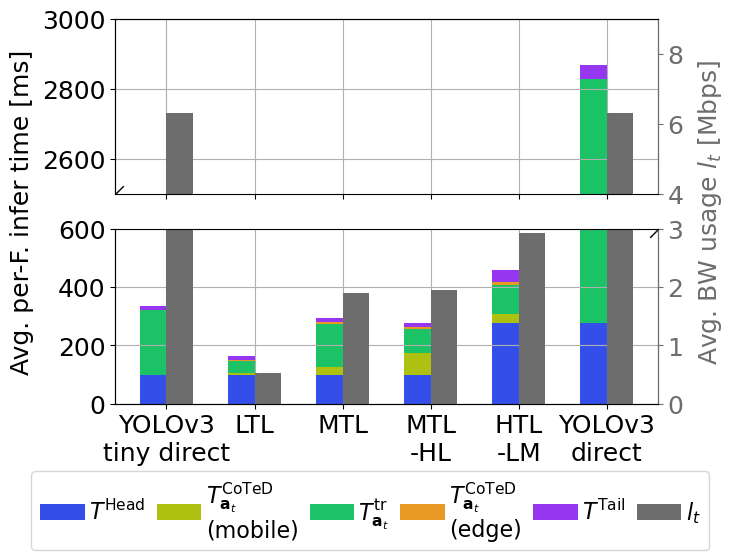

In [11]:
fig, (ax_high,ax_low) = plt.subplots(
    2, 1, sharex=True, figsize=(7, 5),
    gridspec_kw={'height_ratios': [1, 1]}
)

# Lower part (0–500)
p1 = ax_low.bar(ind - width/2, dnn_mobile, width,color= plot_colors["dnn_mobile"])
p2 = ax_low.bar(ind- width/2, coted_mobile, width, bottom = dnn_mobile,color =plot_colors["coted_mobile"])
p3 = ax_low.bar(ind- width/2, trans_time, width, bottom = coted_mobile+dnn_mobile, color= plot_colors["trans"])
p4 = ax_low.bar(ind- width/2, coted_edge, width, bottom = trans_time+coted_mobile+dnn_mobile,color=plot_colors["coted_edge"])
ax_low.bar(ind- width/2, dnn_edge, width, bottom = coted_edge+trans_time+coted_mobile+dnn_mobile,color=plot_colors["dnn_edge"])
ax_low.set_ylim(0, 600)

# Upper part (2500–3000)
ax_high.bar(ind- width/2, trans_time, width, bottom = coted_mobile+dnn_mobile, color= plot_colors["trans"])
p5 = ax_high.bar(ind- width/2, dnn_edge, width, bottom = coted_edge+trans_time+coted_mobile+dnn_mobile,color=plot_colors["dnn_edge"])
ax_high.set_ylim(2500, 3000)


# Lower subplot right axis
ax_low_right = ax_low.twinx()
ax_low_right.set_ylim(0, 3)
p6 = ax_low_right.bar(ind + width/2, bw_usage, width,color= plot_colors["bw_usage"])
# Upper subplot right axis
ax_high_right = ax_high.twinx()
ax_high_right.set_ylim(4, 9)
p6 = ax_high_right.bar(ind + width/2, bw_usage, width,color= plot_colors["bw_usage"])

# Hide the spines between the plots
ax_low.spines['top'].set_visible(False)
ax_high.spines['bottom'].set_visible(False)

# Add diagonal break marks
kwargs = dict(marker=[(-1, -1), (1, 1)],
              markersize=12, linestyle='none', color='k', mew=1)

ax_low.plot([0, 1], [1, 1], transform=ax_low.transAxes, **kwargs)
ax_high.plot([0, 1], [0, 0], transform=ax_high.transAxes, **kwargs)

ax_low.grid()
ax_high.grid()

ax_low.set_ylabel('Avg. per-F. infer time [ms]')
ax_low.yaxis.set_label_coords(-0.15, 1.1)

ax_low_right.set_ylabel("Avg. BW usage $l_t$ [Mbps]")
ax_low_right.yaxis.set_label_coords(1.07, 1.1)


ax_low_right.tick_params(axis='y', colors=plot_colors["bw_usage"])
ax_low_right.spines['right'].set_color(plot_colors["bw_usage"])
ax_low_right.yaxis.label.set_color(plot_colors["bw_usage"])

# For ax_high_right
ax_high_right.tick_params(axis='y', colors=plot_colors["bw_usage"])
ax_high_right.spines['right'].set_color(plot_colors["bw_usage"])
ax_high_right.yaxis.label.set_color(plot_colors["bw_usage"])

ax_low.set_xticks(ind, ('YOLOv3\ntiny direct','LTL', 'MTL', 'MTL\n-HL',"HTL\n-LM",'YOLOv3\ndirect'))
ax_low.legend((p1[0], p2[0], p3[0],p4[0],p5[0],p6[0]),
           (r"$T^{\mathrm{Head}}$", r"$T^{\mathrm{CoTeD}}_{\mathbf{a}_t}$"+"\n(mobile)", r"$T^{\mathrm{tr}}_{\mathbf{a}_t}$",r"$T^{\mathrm{CoTeD}}_{\mathbf{a}_t}$"+"\n(edge)",r"$T^{\mathrm{Tail}}$",r"$l_t$"),
           ncol=6, loc='lower center', bbox_to_anchor=(0.47, -0.9),
           fontsize=16, columnspacing=0.5, handletextpad=0.2)

# plt.savefig("../figures/breakdown.pdf", bbox_inches='tight')

In [13]:
(coted_edge+coted_mobile)/(dnn_edge+coted_edge+trans_time+coted_mobile+dnn_mobile)

array([0.        , 0.05337498, 0.10724005, 0.28288715, 0.08709272,
       0.        ])

In [17]:
(trans_time[0]-trans_time)/trans_time[0]

array([  0.        ,   0.81764447,   0.33679385,   0.62333119,
         0.55158476, -10.42857143])

In [18]:
(trans_time[-1]-trans_time)/trans_time[-1]

array([0.9125    , 0.98404389, 0.94196946, 0.96704148, 0.96076367,
       0.        ])

In [15]:
bw_usage/bw_usage[0]

array([1.        , 0.08410137, 0.3021719 , 0.30929833, 0.46444241,
       1.        ])